<a href="https://colab.research.google.com/github/Paoarlett10/Tarea3/blob/main/Ejercicio_24_b).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ejercicio 24**
Nombre: Vazquez Jimenez Arlett Paola

24 b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Datos originales
Datos_x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01])
Datos_y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15])

# Construir la matriz A y el vector z
A = []
z = []

# Lo hacemos con base a nuestra ecuación
#(a * Y**2) + (b * X * Y) + (c * X) + (d * Y) + e = X**2
for x, y in zip(Datos_x, Datos_y):
    A.append([y**2, x*y, x, y, 1])
    z.append(x**2)

A = np.array(A)
z = np.array(z)

# Perturbar los datos
np.random.seed(0)  #valores random
perturbados_x = Datos_x + np.random.uniform(-0.0005, 0.005, size=Datos_x.shape)
perturbados_y = Datos_y + np.random.uniform(-0.0005, 0.005, size=Datos_y.shape)

# Construir matriz A y vector z con datos perturbados
A_perturbados = []
z_perturbados = []

for x, y in zip(perturbados_x, perturbados_y):
    A_perturbados.append([y**2, x*y, x, y, 1])
    z_perturbados.append(x**2)

A_perturbados = np.array(A_perturbados)
z_perturbados = np.array(z_perturbados)

# Resolver el sistema normal: (A^T A)x = A^T z
AtA_p = A_perturbados.T @ A_perturbados
Atz_p = A_perturbados.T @ z_perturbados

# Invertir AtA
AtA_invertida_p = np.linalg.inv(AtA_p)

# Solución
Parametros_Perturbados = AtA_invertida_p @ Atz_p

# Extraer parámetros
a_p, b_p, c_p, d_p, e_p = Parametros_Perturbados

print("\nParámetros con datos perturbados:")
print(f"a = {a_p:.6f}")
print(f"b = {b_p:.6f}")
print(f"c = {c_p:.6f}")
print(f"d = {d_p:.6f}")
print(f"e = {e_p:.6f}")

# Comparar con los parámetros originales
Parametros_Original = np.linalg.lstsq(A, z, rcond=None)[0] #En el inciso a) lo realizamos sin utilizar numpy, aqui nos apoyaremos de np.linalg.lstsq
print("\nParametros originales:\n",Parametros_Original)

# Obtener la diferencia
print("\nDiferencia con los parámetros originales:")
for i, (Original, Perturbados) in enumerate(zip(Parametros_Original, Parametros_Perturbados)):
    print(f"Parámetro {['a','b','c','d','e'][i]}: {Perturbados - Original:.6e}")





Parámetros con datos perturbados:
a = -1.898795
b = -0.201566
c = 0.627235
d = 3.129748
e = -0.448909

Parametros originales:
 [-2.63562548  0.14364618  0.55144696  3.22294034 -0.43289427]

Diferencia con los parámetros originales:
Parámetro a: 7.368306e-01
Parámetro b: -3.452124e-01
Parámetro c: 7.578763e-02
Parámetro d: -9.319257e-02
Parámetro e: -1.601466e-02


<ipython-input-2-e388969e374e>:10: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z_original, levels=[0], colors='lightgreen', linewidths=2, label='Original')
<ipython-input-2-e388969e374e>:11: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(X, Y, Z_perturbada, levels=[0], colors='orange', linewidths=2, linestyles='--', label='Perturbada')


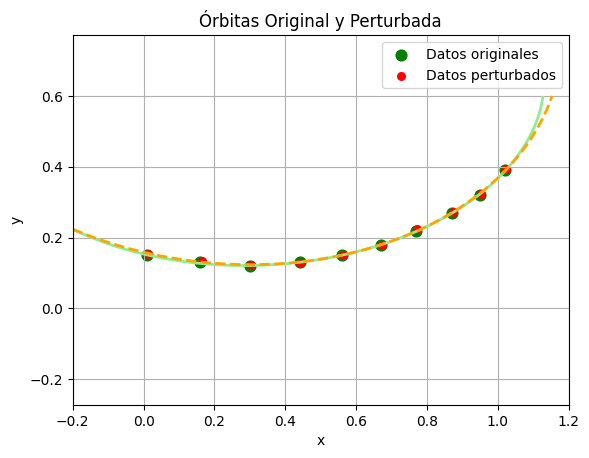

In [2]:
# Graficar ambas órbitas
Rango_x = np.linspace(-0.2, 1.2, 400)
Rango_y = np.linspace(-0.1, 0.6, 400)
X, Y = np.meshgrid(Rango_x, Rango_y)

# Ecuación original y perturbada
Z_original = Parametros_Original[0] * Y**2 + Parametros_Original[1] * X * Y + Parametros_Original[2] * X + Parametros_Original[3] * Y + Parametros_Original[4] - X**2
Z_perturbada = a_p * Y**2 + b_p * X * Y + c_p * X + d_p * Y + e_p - X**2

plt.contour(X, Y, Z_original, levels=[0], colors='lightgreen', linewidths=2, label='Original')
plt.contour(X, Y, Z_perturbada, levels=[0], colors='orange', linewidths=2, linestyles='--', label='Perturbada')
plt.scatter(Datos_x, Datos_y, color='green', label='Datos originales', s=60)
plt.scatter(perturbados_x, perturbados_y, color='red', label='Datos perturbados', s=30)
plt.title("Órbitas Original y Perturbada")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.axis("equal")
plt.show()


Al comparar la órbita ajustada con los datos originales y la obtenida tras perturbar los datos, se observa un cambio en la forma de la curva. Este comportamiento se debe a que el problema es casi deficiente en rango y en consecuencia, pequeñas perturbaciones en los datos de entrada generan variaciones en los parámetros estimados del modelo, lo que se traduce en una órbita visualmente diferente.